# Principal Component Analysis (PCA) - Linear


***

[scikit-learn Doc](http://scikit-learn.org/stable/modules/decomposition.html#pca)

[scikit-learn Parameters](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)

* Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.


1901 by Karl Pearson

* Unsupervised Machine Learning

[Wikipedia](https://en.wikipedia.org/wiki/Principal_component_analysis)


* Statistical procedure that utilise [orthogonal transformation](https://en.wikipedia.org/wiki/Orthogonal_transformation) technology

* Convert possible correlated features (predictors) into linearly uncorrelated features (predictors) called **principal components**

* \# of principal components <= number of features (predictors)

* First principal component explains the largest possible variance

* Each subsequent component has the highest variance subject to the restriction that it must be orthogonal to the preceding components. 

* A collection of the components are called vectors.

* Sensitive to scaling


**Note:**

* Used in exploratory data analysis (EDA) 

* Visualize genetic distance and relatedness between populations. 


* Method:

  * Eigenvalue decomposition of a data covariance (or correlation) matrix

  * Singular value decomposition of a data matrix (After mean centering / normalizing ) the data matrix for each attribute.


* Output

  * Component scores, sometimes called **factor scores** (the transformed variable values)
  
  * **loadings** (the weight)

* Data compression and information preservation 

* Visualization

* Noise filtering

* Feature extraction and engineering

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
rnd_num = np.random.RandomState(42)
X = np.dot(rnd_num.rand(2,2), rnd_num.randn(2,500)).T

In [16]:
X

array([[-7.06275032e-01, -5.60911546e-01],
       [-5.50810755e-01, -4.63008578e-01],
       [ 2.82811768e-02,  8.01332565e-01],
       [-5.33973291e-01,  4.45221679e-02],
       [-1.29706786e-01, -3.14604522e-01],
       [-5.86785660e-01, -1.00304672e-01],
       [ 8.35586558e-02, -1.77307670e-01],
       [-2.22196567e-01, -3.70986829e-01],
       [-1.36546749e-01,  3.40666414e-02],
       [-1.57943397e+00, -1.94383023e+00],
       [-1.19439569e+00, -1.60791845e+00],
       [ 5.07562007e-01,  4.06303013e-02],
       [ 9.68832484e-02, -4.41507920e-01],
       [-8.11677523e-01, -3.55194597e-01],
       [-2.45654801e-01, -6.05201995e-01],
       [ 1.85390092e-01, -5.83973477e-01],
       [-1.03818322e+00,  7.34423846e-02],
       [ 4.32018026e-01,  1.60020305e-01],
       [-6.04673866e-01, -3.47255098e-01],
       [ 8.85096246e-03, -7.01313307e-01],
       [-9.29534570e-01, -8.55416426e-01],
       [-1.67438227e+00, -9.99313319e-01],
       [-1.97842115e+00, -1.81686241e+00],
       [ 1.

In [17]:
X[:,0] = -X[:,0]

(-3.36000306145041, 3.3314115919910354, -2.881825799615855, 4.1556598184440166)

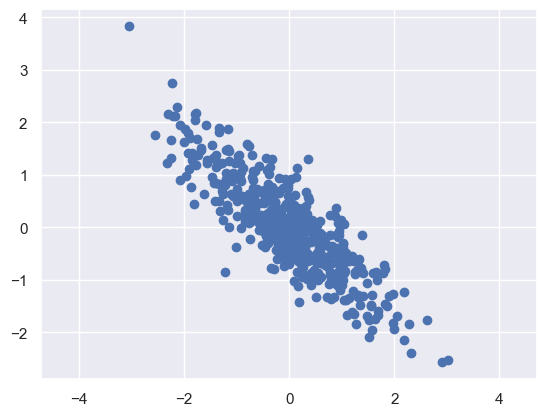

In [18]:
plt.scatter(X[:, 0], X[:, 1]);
plt.axis("equal")

In [21]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [24]:
print(pca.components_)

[[-0.74062812  0.67191517]
 [-0.67191517 -0.74062812]]


In [25]:
print(pca.explained_variance_)

[1.62123504 0.12581594]


In [26]:
print(pca.explained_variance_ratio_)

[0.92798382 0.07201618]


--> first component shows 92.7% variability while the second one shows 72.2% variability

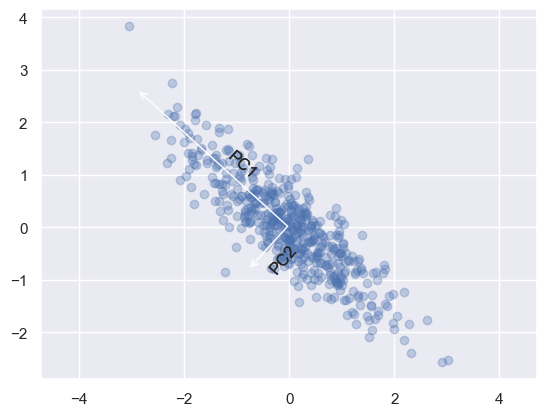

In [27]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)


# plot data

for k, v in zip(pca.explained_variance_, pca.components_):
    vec = v * 3 * np.sqrt(k)
    
    ax = plt.gca()
    arrowprops=dict(arrowstyle='<-',
                    linewidth=1,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', pca.mean_, pca.mean_ + vec, arrowprops=arrowprops)
    ax.text(-0.90, 1.2,'PC1', ha='center', va='center', rotation=-42, size=12)
    ax.text(-0.1,-0.6,'PC2', ha='center', va='center', rotation=50, size=12)
plt.axis('equal');

* Two principal components
* Length denotes the significance 

This transformation from data axes to principal axes is as an affine transformation, which basically means it is composed of a translation, rotation, and uniform scaling.

# DImensionality reduction with PCA

* It can help in reducing the size of image or data.
* Can compress upto 50% the size of image.

In [28]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)

In [29]:
X.shape

(500, 2)

In [30]:
X_pca.shape

(500, 1)

(-3.9188024367345218,
 3.358021086052184,
 -2.9716133728185485,
 4.159935417167954)

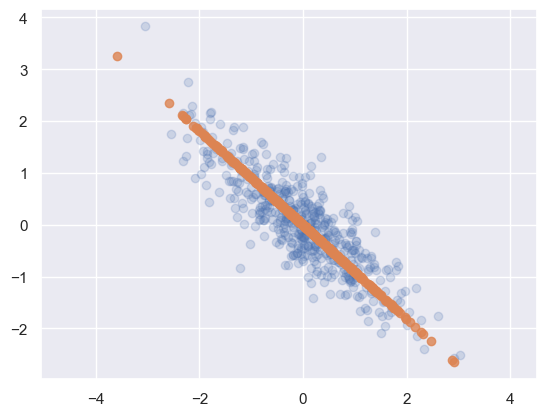

In [31]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:,0], X[:,1], alpha=0.2);
plt.scatter(X_new[:,0], X_new[:,1], alpha=0.8);
plt.axis("equal")

The red line is PCA
& The light blue is original data!

***